In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

from citipy import citipy
from datetime import datetime
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

600

In [6]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | soyo
Processing Record 2 of Set 12 | coari
Processing Record 3 of Set 12 | havre-saint-pierre
Processing Record 4 of Set 12 | punta arenas
Processing Record 5 of Set 12 | butaritari
Processing Record 6 of Set 12 | rikitea
Processing Record 7 of Set 12 | kodiak
Processing Record 8 of Set 12 | mataura
Processing Record 9 of Set 12 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set 12 | acapulco
Processing Record 11 of Set 12 | hobart
Processing Record 12 of Set 12 | vanimo
Processing Record 13 of Set 12 | sierra vista
Processing Record 14 of Set 12 | ushuaia
Processing Record 15 of Set 12 | bryukhovetskaya
Processing Record 16 of Set 12 | bluff
Processing Record 17 of Set 12 | luderitz
Processing Record 18 of Set 12 | mayo
Processing Record 19 of Set 12 | fort saint john
City not found. Skipping...
Processing Record 20 of Set 12 | taolanaro
City not found. Skipping...
Proce

Processing Record 34 of Set 15 | coahuayana
Processing Record 35 of Set 15 | kirakira
Processing Record 36 of Set 15 | nyurba
Processing Record 37 of Set 15 | grand gaube
Processing Record 38 of Set 15 | surt
Processing Record 39 of Set 15 | merano
Processing Record 40 of Set 15 | chalus
Processing Record 41 of Set 15 | kudahuvadhoo
Processing Record 42 of Set 15 | makakilo city
Processing Record 43 of Set 15 | katsuura
Processing Record 44 of Set 15 | umzimvubu
City not found. Skipping...
Processing Record 45 of Set 15 | yichang
Processing Record 46 of Set 15 | portobelo
Processing Record 47 of Set 15 | kunya
Processing Record 48 of Set 15 | sentyabrskiy
City not found. Skipping...
Processing Record 49 of Set 15 | montrose
Processing Record 50 of Set 15 | portland
Processing Record 1 of Set 16 | hendersonville
Processing Record 2 of Set 16 | port hardy
Processing Record 3 of Set 16 | haines junction
Processing Record 4 of Set 16 | alta floresta
Processing Record 5 of Set 16 | kapaa
Pr

Processing Record 21 of Set 19 | wagar
Processing Record 22 of Set 19 | santa eulalia del rio
City not found. Skipping...
Processing Record 23 of Set 19 | mitsamiouli
Processing Record 24 of Set 19 | cockburn town
Processing Record 25 of Set 19 | reitz
Processing Record 26 of Set 19 | mira
Processing Record 27 of Set 19 | leshukonskoye
Processing Record 28 of Set 19 | east london
Processing Record 29 of Set 19 | karabuk
Processing Record 30 of Set 19 | mehamn
Processing Record 31 of Set 19 | lavrentiya
Processing Record 32 of Set 19 | sergiyevsk
Processing Record 33 of Set 19 | oktyabrskiy
Processing Record 34 of Set 19 | cortez
Processing Record 35 of Set 19 | guerrero negro
Processing Record 36 of Set 19 | magadan
Processing Record 37 of Set 19 | pangai
Processing Record 38 of Set 19 | ferrol
Processing Record 39 of Set 19 | chernyshevskiy
Processing Record 40 of Set 19 | bethel
Processing Record 41 of Set 19 | aswan
Processing Record 42 of Set 19 | hovd
Processing Record 43 of Set 1

Processing Record 4 of Set 23 | balkanabat
Processing Record 5 of Set 23 | kachikau
City not found. Skipping...
Processing Record 6 of Set 23 | fukue
Processing Record 7 of Set 23 | lake havasu city
Processing Record 8 of Set 23 | ozernovskiy
Processing Record 9 of Set 23 | bathsheba
Processing Record 10 of Set 23 | camacari
Processing Record 11 of Set 23 | rungata
City not found. Skipping...
Processing Record 12 of Set 23 | bandarbeyla
Processing Record 13 of Set 23 | sarkand
Processing Record 14 of Set 23 | kadykchan
City not found. Skipping...
Processing Record 15 of Set 23 | shimoda
Processing Record 16 of Set 23 | changji
Processing Record 17 of Set 23 | nogliki
Processing Record 18 of Set 23 | nha trang
Processing Record 19 of Set 23 | atbasar
Processing Record 20 of Set 23 | preobrazheniye
Processing Record 21 of Set 23 | nhulunbuy
Processing Record 22 of Set 23 | sheridan
Processing Record 23 of Set 23 | valdosta
Processing Record 24 of Set 23 | zhezkazgan
Processing Record 25 

In [7]:
len(city_data)

550

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Soyo,-6.1349,12.3689,76.64,80,12,7.81,AO,2021-10-17 00:14:49
1,Coari,-4.0850,-63.1414,84.97,49,82,1.95,BR,2021-10-17 00:14:49
2,Havre-Saint-Pierre,50.2334,-63.5986,48.13,87,67,14.63,CA,2021-10-17 00:14:50
3,Punta Arenas,-53.1500,-70.9167,39.31,70,40,9.22,CL,2021-10-17 00:13:33
4,Butaritari,3.0707,172.7902,81.81,68,9,12.84,KI,2021-10-17 00:14:50
5,Rikitea,-23.1203,-134.9692,75.09,80,12,11.12,PF,2021-10-17 00:14:51
6,Kodiak,57.7900,-152.4072,44.11,45,1,8.05,US,2021-10-17 00:14:51
7,Mataura,-46.1927,168.8643,66.87,43,38,8.95,NZ,2021-10-17 00:14:52
8,Acapulco,16.8634,-99.8901,84.02,79,90,4.61,MX,2021-10-17 00:09:58
9,Hobart,-42.8794,147.3294,59.05,59,75,1.01,AU,2021-10-17 00:10:31


In [9]:
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Soyo,AO,2021-10-17 00:14:49,-6.1349,12.3689,76.64,80,12,7.81
1,Coari,BR,2021-10-17 00:14:49,-4.0850,-63.1414,84.97,49,82,1.95
2,Havre-Saint-Pierre,CA,2021-10-17 00:14:50,50.2334,-63.5986,48.13,87,67,14.63
3,Punta Arenas,CL,2021-10-17 00:13:33,-53.1500,-70.9167,39.31,70,40,9.22
4,Butaritari,KI,2021-10-17 00:14:50,3.0707,172.7902,81.81,68,9,12.84


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

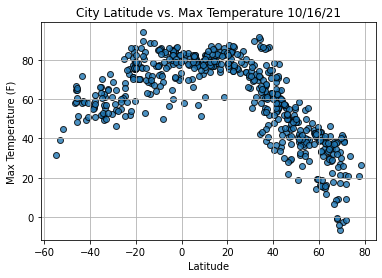

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

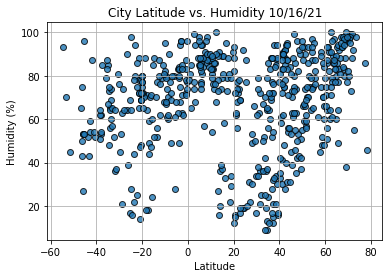

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

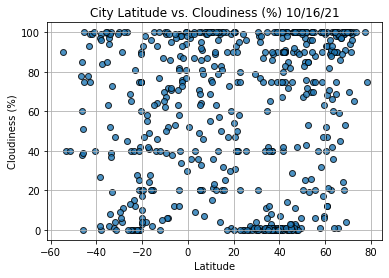

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

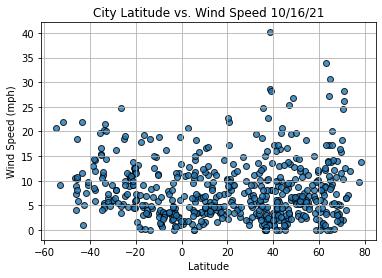

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()